# **Mounts the Drive**

In [1]:
# This code mounts the drive. All data need to be kept in this drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***ADD TESTING FOLDER LOCATION***

DATA is available at https://drive.google.com/drive/folders/1qtikt1S1nisJerzhDLBdBUhdniqMb6G8?usp=sharing

In [2]:
# Change this folder if you want to test. If new data is required to be tested then put it in the ChewingRateTestingData folder.
testingFolderLocation = "/content/drive/MyDrive/FinalProject-559/ChewingRateTestingData/2024-12-14_18-40-17/"

## **Visualization**

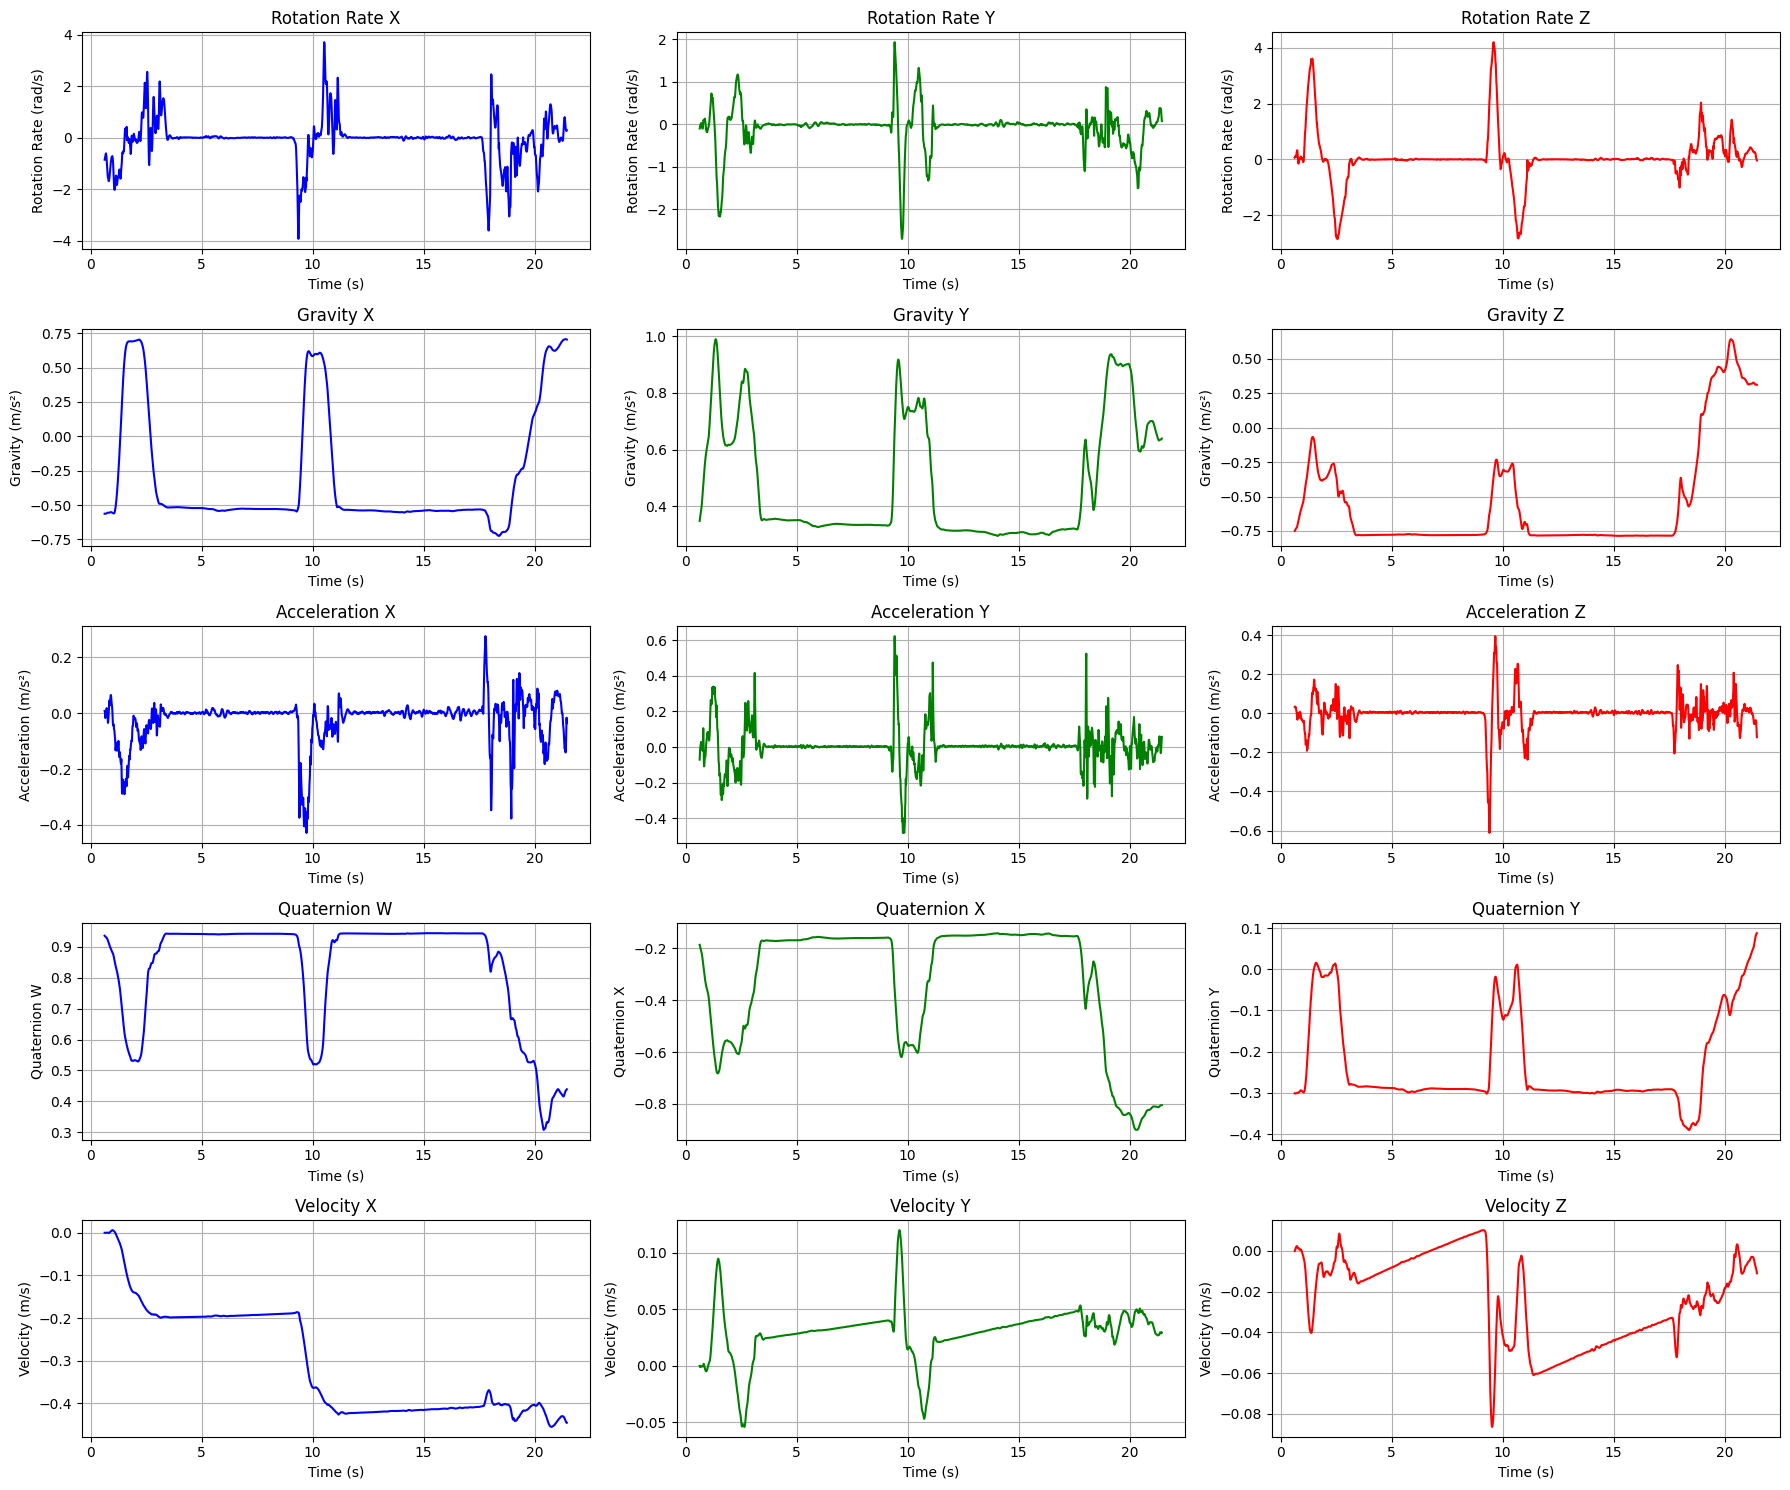

In [3]:
# This code helps in visualization and detecting which parameters to be used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fileForVisualization = testingFolderLocation + "WristMotion.csv" # Just change the path for which you want visualization. It can be smart watch data or airpod data
data = pd.read_csv(fileForVisualization)

frequency = 100
delta_t = 1 / frequency

velocity_x = np.zeros(len(data))
velocity_y = np.zeros(len(data))
velocity_z = np.zeros(len(data))

for i in range(1, len(data)):
    velocity_x[i] = velocity_x[i - 1] + data['accelerationX'][i - 1] * delta_t
    velocity_y[i] = velocity_y[i - 1] + data['accelerationY'][i - 1] * delta_t
    velocity_z[i] = velocity_z[i - 1] + data['accelerationZ'][i - 1] * delta_t

data['velocity_x'] = velocity_x
data['velocity_y'] = velocity_y
data['velocity_z'] = velocity_z

fig, axes = plt.subplots(5, 3, figsize=(18, 15))

axes[0, 0].plot(data['seconds_elapsed'], data['rotationRateX'], label='Rotation Rate X', color='blue')
axes[0, 0].set_title('Rotation Rate X')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Rotation Rate (rad/s)')
axes[0, 0].grid(True)

axes[0, 1].plot(data['seconds_elapsed'], data['rotationRateY'], label='Rotation Rate Y', color='green')
axes[0, 1].set_title('Rotation Rate Y')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Rotation Rate (rad/s)')
axes[0, 1].grid(True)

axes[0, 2].plot(data['seconds_elapsed'], data['rotationRateZ'], label='Rotation Rate Z', color='red')
axes[0, 2].set_title('Rotation Rate Z')
axes[0, 2].set_xlabel('Time (s)')
axes[0, 2].set_ylabel('Rotation Rate (rad/s)')
axes[0, 2].grid(True)

axes[1, 0].plot(data['seconds_elapsed'], data['gravityX'], label='Gravity X', color='blue')
axes[1, 0].set_title('Gravity X')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Gravity (m/s²)')
axes[1, 0].grid(True)

axes[1, 1].plot(data['seconds_elapsed'], data['gravityY'], label='Gravity Y', color='green')
axes[1, 1].set_title('Gravity Y')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Gravity (m/s²)')
axes[1, 1].grid(True)

axes[1, 2].plot(data['seconds_elapsed'], data['gravityZ'], label='Gravity Z', color='red')
axes[1, 2].set_title('Gravity Z')
axes[1, 2].set_xlabel('Time (s)')
axes[1, 2].set_ylabel('Gravity (m/s²)')
axes[1, 2].grid(True)

# Plot accelerations
axes[2, 0].plot(data['seconds_elapsed'], data['accelerationX'], label='Acceleration X', color='blue')
axes[2, 0].set_title('Acceleration X')
axes[2, 0].set_xlabel('Time (s)')
axes[2, 0].set_ylabel('Acceleration (m/s²)')
axes[2, 0].grid(True)

axes[2, 1].plot(data['seconds_elapsed'], data['accelerationY'], label='Acceleration Y', color='green')
axes[2, 1].set_title('Acceleration Y')
axes[2, 1].set_xlabel('Time (s)')
axes[2, 1].set_ylabel('Acceleration (m/s²)')
axes[2, 1].grid(True)

axes[2, 2].plot(data['seconds_elapsed'], data['accelerationZ'], label='Acceleration Z', color='red')
axes[2, 2].set_title('Acceleration Z')
axes[2, 2].set_xlabel('Time (s)')
axes[2, 2].set_ylabel('Acceleration (m/s²)')
axes[2, 2].grid(True)

# Plot quaternion components
axes[3, 0].plot(data['seconds_elapsed'], data['quaternionW'], label='Quaternion W', color='blue')
axes[3, 0].set_title('Quaternion W')
axes[3, 0].set_xlabel('Time (s)')
axes[3, 0].set_ylabel('Quaternion W')
axes[3, 0].grid(True)

axes[3, 1].plot(data['seconds_elapsed'], data['quaternionX'], label='Quaternion X', color='green')
axes[3, 1].set_title('Quaternion X')
axes[3, 1].set_xlabel('Time (s)')
axes[3, 1].set_ylabel('Quaternion X')
axes[3, 1].grid(True)

axes[3, 2].plot(data['seconds_elapsed'], data['quaternionY'], label='Quaternion Y', color='red')
axes[3, 2].set_title('Quaternion Y')
axes[3, 2].set_xlabel('Time (s)')
axes[3, 2].set_ylabel('Quaternion Y')
axes[3, 2].grid(True)

axes[4, 0].plot(data['seconds_elapsed'], data['velocity_x'], label='Velocity X', color='blue')
axes[4, 0].set_title('Velocity X')
axes[4, 0].set_xlabel('Time (s)')
axes[4, 0].set_ylabel('Velocity (m/s)')
axes[4, 0].grid(True)

axes[4, 1].plot(data['seconds_elapsed'], data['velocity_y'], label='Velocity Y', color='green')
axes[4, 1].set_title('Velocity Y')
axes[4, 1].set_xlabel('Time (s)')
axes[4, 1].set_ylabel('Velocity (m/s)')
axes[4, 1].grid(True)

axes[4, 2].plot(data['seconds_elapsed'], data['velocity_z'], label='Velocity Z', color='red')
axes[4, 2].set_title('Velocity Z')
axes[4, 2].set_xlabel('Time (s)')
axes[4, 2].set_ylabel('Velocity (m/s)')
axes[4, 2].grid(True)

plt.tight_layout()
plt.show()


# **Merge Bite Taken Data**

In [4]:
# This code merge all the data collected for bite taken motion.
import pandas as pd
import os
basepath = "/content/drive/MyDrive/FinalProject-559/BiteTaken/"
column_name = "seconds_elapsed"

csv_files = [os.path.join(basepath, f) for f in os.listdir(basepath) if f.endswith('.csv')]


merged_data = pd.DataFrame()
max_seconds = 0

for file in csv_files:
    data = pd.read_csv(file)
    if column_name in data.columns:
        data[column_name] += max_seconds

    max_seconds = data[column_name].max()

    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data = merged_data.drop(columns=['time'])

#Labeling With 'YES' values
merged_data['Bite Taken'] = 1

output_file = "MergedBiteTakenWristMotion.csv"
merged_data.to_csv(output_file, index=True)

print(f"Data merged successfully and saved to {output_file}")


Data merged successfully and saved to MergedBiteTakenWristMotion.csv


# **Merge Bite NOT Taken Data**

In [5]:
# This code merge all the data collected for bite not taken motion.
import pandas as pd
import os

basepath = "/content/drive/MyDrive/FinalProject-559/BiteNotTaken/"
column_name = "seconds_elapsed"

csv_files = [os.path.join(basepath, f) for f in os.listdir(basepath) if f.endswith('.csv')]

merged_data = pd.DataFrame()
max_seconds = 0

for file in csv_files:
    data = pd.read_csv(file)

    if column_name in data.columns:
        data[column_name] += max_seconds

    max_seconds = data[column_name].max()
    merged_data = pd.concat([merged_data, data], ignore_index=True)


merged_data = merged_data.drop(columns=['time'])

# Labeling with 'NO' values
merged_data['Bite Taken'] = 0

output_file = "MergedBiteNotTakenWristMotion.csv"
merged_data.to_csv(output_file, index=True)

print(f"Data merged successfully and saved to {output_file}")


Data merged successfully and saved to MergedBiteNotTakenWristMotion.csv


# **Filter for bite Detection Data.**

In [6]:
from scipy.signal import butter, filtfilt

def biteDetectionLowPassFilter(data, order=4):
    """
    Applies a low-pass Butterworth filter to the data.

    Parameters:
    - data: Input data array to filter
    - cutoff: Cutoff frequency in Hz
    - fs: Sampling frequency in Hz
    - order: Order of the Butterworth filter (default: 4)

    Returns:
    - Filtered data
    """

    sampling_frequency = 100
    cutoff_frequency = 3  # Cutoff at 3 Hz to focus on low-frequency motions

    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

Filtered data saved to PreprocessedBiteTakenData.csv


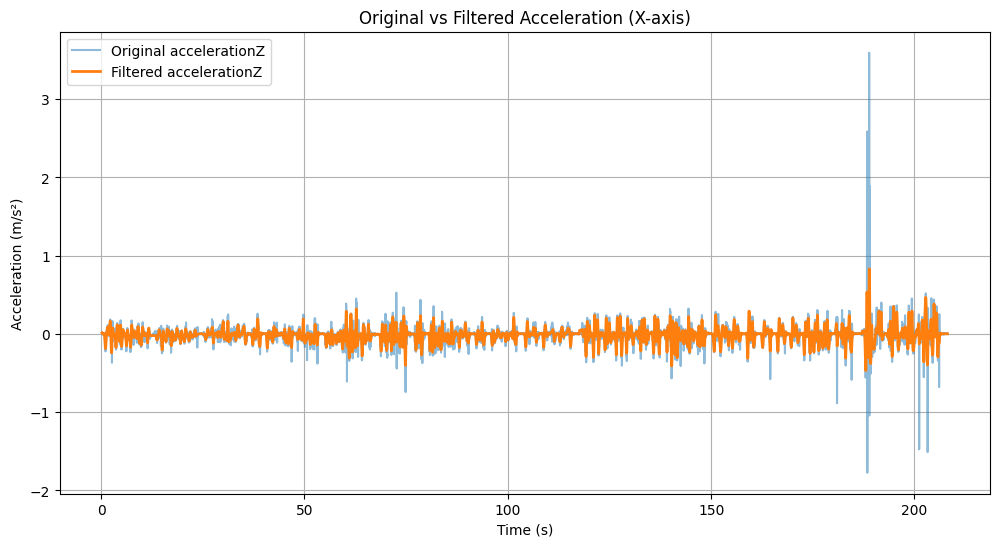

In [7]:
# This code filter all the bite taken data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "MergedBiteTakenWristMotion.csv"
data = pd.read_csv(file_path)

for col in ['accelerationX', 'accelerationY', 'accelerationZ']:
    data[f'filtered_{col}'] = biteDetectionLowPassFilter(data[col])

output_file = "PreprocessedBiteTakenData.csv"
data.to_csv(output_file, index=False)
print(f"Filtered data saved to {output_file}")

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['seconds_elapsed'], data['accelerationZ'], label='Original accelerationZ', alpha=0.5)
plt.plot(data['seconds_elapsed'], data['filtered_accelerationZ'], label='Filtered accelerationZ', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Original vs Filtered Acceleration (X-axis)")
plt.legend()
plt.grid()
plt.show()


# **PRE PROCESS BITE NOT TAKEN DATA**

Filtered data saved to PreprocessedBiteNotTakenData.csv


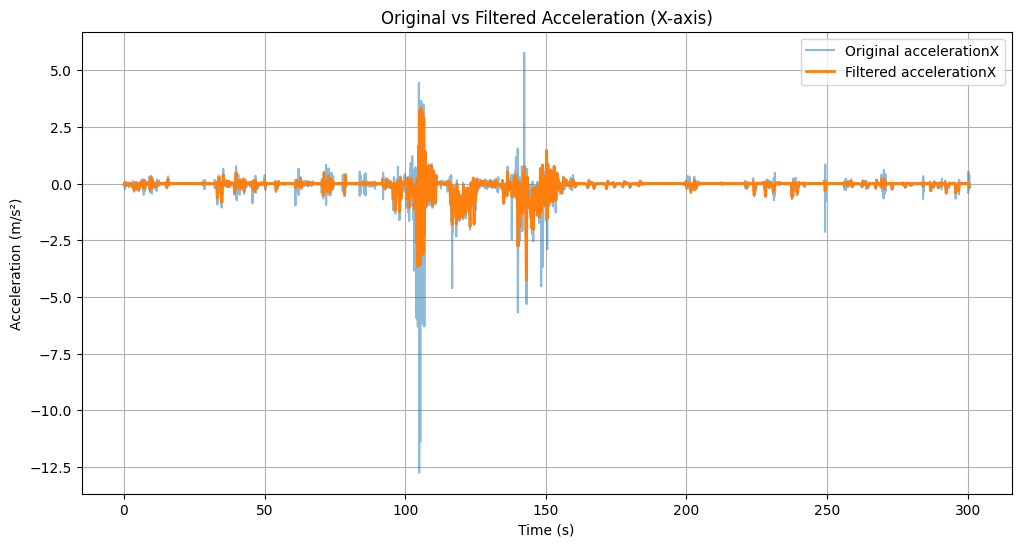

In [8]:
# This code filters all the bite not taken data.

import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

file_path = "MergedBiteNotTakenWristMotion.csv"
data = pd.read_csv(file_path)

for col in ['accelerationX', 'accelerationY', 'accelerationZ']:
    data[f'filtered_{col}'] = biteDetectionLowPassFilter(data[col])

output_file = "PreprocessedBiteNotTakenData.csv"
data.to_csv(output_file, index=False)
print(f"Filtered data saved to {output_file}")

plt.figure(figsize=(12, 6))
plt.plot(data['seconds_elapsed'], data['accelerationX'], label='Original accelerationX', alpha=0.5)
plt.plot(data['seconds_elapsed'], data['filtered_accelerationX'], label='Filtered accelerationX', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Original vs Filtered Acceleration (X-axis)")
plt.legend()
plt.grid()
plt.show()


# **Train the MODEL**

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

window_size = 250  # e.g. 2.5 seconds,(1 second for 100Hz frequency)
step_size = 50

In [10]:
def extract_features(window):
    feature_vector = []
    for col in ['filtered_accelerationX', 'filtered_accelerationY', 'filtered_accelerationZ', 'rotationRateX', 'rotationRateY', 'rotationRateZ', 'gravityX', 'gravityZ', 'quaternionX', 'quaternionY', 'quaternionZ']:
        feature_vector += [
            window[col].mean(),
            window[col].std(),
            window[col].max(),
            window[col].min(),
            np.ptp(window[col]),  # Peak-to-peak range
        ]
    return feature_vector

In [11]:
#BITE TAKEN DATA FEATURES AND LABELS MADE

biteTakenData = pd.read_csv("PreprocessedBiteTakenData.csv")
biteTakenData.head()

# Sliding window feature extraction
biteTakenFeatures = []
for start in range(0, len(biteTakenData) - window_size + 1, step_size):
    window = biteTakenData.iloc[start:start + window_size]
    biteTakenFeatures.append(extract_features(window))

biteTakenFeaturesDF = pd.DataFrame(biteTakenFeatures)

labels = [1]*len(biteTakenFeatures)
biteTakenlabelsDF = pd.DataFrame(labels, columns=['Target'])
biteTakenDF = pd.concat([biteTakenFeaturesDF, biteTakenlabelsDF], axis=1)
biteTakenDF.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Target
0,-0.099185,0.088258,0.021663,-0.286139,0.307802,0.019946,0.180937,0.406307,-0.346118,0.752425,...,0.241560,0.257778,-0.366740,0.624518,0.155819,0.218785,0.567727,-0.115128,0.682855,1
1,-0.102062,0.085001,0.021973,-0.286139,0.308112,0.016934,0.181624,0.406307,-0.346118,0.752425,...,0.255744,0.257778,-0.397264,0.655042,0.146529,0.226296,0.567727,-0.115128,0.682855,1
2,-0.105617,0.082934,0.021973,-0.286139,0.308112,0.020602,0.182707,0.406307,-0.346118,0.752425,...,0.264536,0.257778,-0.397264,0.655042,0.138186,0.232003,0.567727,-0.115128,0.682855,1
3,-0.119510,0.095722,0.021973,-0.286139,0.308112,0.007421,0.193798,0.406307,-0.346118,0.752425,...,0.261231,0.257778,-0.397264,0.655042,0.140253,0.237023,0.567727,-0.115128,0.682855,1
4,-0.101854,0.089980,0.021973,-0.264752,0.286725,0.015848,0.187061,0.406307,-0.373373,0.779681,...,0.246508,0.216876,-0.397264,0.614140,0.136235,0.230435,0.531846,-0.115128,0.646974,1


In [12]:
#BITE NOT TAKEN DATA FEATURES AND LABELS MADE

biteNotTakenData = pd.read_csv("PreprocessedBiteNotTakenData.csv")
biteNotTakenData.head()

biteNotTakenFeatures = []
for start in range(0, len(biteNotTakenData) - window_size + 1, step_size):
    window = biteNotTakenData.iloc[start:start + window_size]
    biteNotTakenFeatures.append(extract_features(window))

biteNotTakenFeaturesDF = pd.DataFrame(biteNotTakenFeatures)

labels = [0]*len(biteNotTakenFeatures)
biteNotTakenlabelsDF = pd.DataFrame(labels, columns=['Target'])
biteNotTakenDF = pd.concat([biteNotTakenFeaturesDF, biteNotTakenlabelsDF], axis=1)
biteNotTakenDF.head()




,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Target
0,-0.032526,0.025788,0.009202,-0.078792,0.087995,0.014688,0.078481,0.182392,-0.112364,0.294755,...,0.155505,0.14673,-0.273700,0.420430,-0.052393,0.077950,0.039781,-0.210261,0.250043,0
1,-0.038028,0.032672,0.009202,-0.132974,0.142176,0.010129,0.086844,0.182392,-0.158761,0.341153,...,0.108221,0.14673,-0.225270,0.372001,-0.041775,0.086504,0.074245,-0.210261,0.284506,0
2,-0.043124,0.038124,0.009202,-0.192003,0.201205,-0.023775,0.111496,0.173860,-0.416128,0.589988,...,0.139077,0.14673,-0.295285,0.442016,-0.000574,0.114696,0.200374,-0.210261,0.410635,0
3,-0.063520,0.076620,0.023374,-0.294135,0.317509,-0.032728,0.147646,0.260547,-0.416128,0.676675,...,0.157316,0.14673,-0.295285,0.442016,0.038634,0.085457,0.200374,-0.151793,0.352167,0
4,-0.079293,0.084383,0.029211,-0.294135,0.323346,-0.052937,0.169755,0.270599,-0.416128,0.686727,...,0.182621,0.30302,-0.295285,0.598305,0.008731,0.123123,0.200374,-0.215906,0.416280,0


In [13]:
df = pd.concat([biteTakenDF, biteNotTakenDF], ignore_index=True)

shuffled_df = df.sample(frac=1, random_state=40).reset_index(drop=True)
shuffled_df.head(5)



,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Target
0,0.000524,0.002439,0.006686,-0.009092,0.015778,-0.001653,0.001730,0.002755,-0.005546,0.008301,...,0.005243,-0.273602,-0.299072,0.025470,0.213276,0.006633,0.223625,0.204500,0.019125,0
1,-0.110089,0.099842,0.039252,-0.357797,0.397049,-0.040995,0.185169,0.401554,-0.305706,0.707260,...,0.122207,0.283260,-0.198328,0.481587,0.162386,0.283385,0.642229,-0.223969,0.866198,1
2,-0.008302,0.027225,0.030220,-0.085669,0.115888,0.009870,0.084700,0.191148,-0.166674,0.357822,...,0.243892,0.524639,-0.274828,0.799468,-0.306919,0.230742,0.101060,-0.519580,0.620640,1
3,-0.015173,0.080012,0.111291,-0.326440,0.437731,0.005004,0.016367,0.042781,-0.058605,0.101386,...,0.140061,0.190578,-0.413670,0.604248,-0.229094,0.052043,-0.043028,-0.256665,0.213637,0
4,-0.035635,0.062684,0.048313,-0.185938,0.234251,-0.010303,0.113220,0.271955,-0.220684,0.492639,...,0.040719,0.074340,-0.091401,0.165741,0.237127,0.214086,0.608031,0.018229,0.589802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.089287,0.152932,0.080766,-0.515360,0.596126,0.035788,0.079525,0.281263,-0.076955,0.358218,...,0.139711,0.136962,-0.342360,0.479321,-0.000482,0.012729,0.029830,-0.027189,0.057019,0
96,-0.072065,0.199330,0.474640,-0.371599,0.846239,0.013389,0.144506,0.257800,-0.303012,0.560813,...,0.159601,0.830363,0.125396,0.704967,-0.528508,0.147635,-0.346429,-0.934333,0.587905,1
97,0.001204,0.013978,0.035606,-0.039246,0.074853,-0.002397,0.006677,0.011244,-0.022047,0.033291,...,0.027291,-0.265489,-0.355716,0.090227,0.196933,0.018638,0.223625,0.159221,0.064404,0
98,-0.016867,0.082973,0.133660,-0.187483,0.321143,0.016066,0.110908,0.292430,-0.221731,0.514161,...,0.043133,0.197250,0.020496,0.176755,-0.292219,0.166299,0.024367,-0.554145,0.578512,0


In [14]:
# This code shuffles the feature records.

features = shuffled_df.drop('Target', axis=1)
labels = shuffled_df['Target']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9765886287625418


# **Testing Bite Detection and Chewing In between bites**

In [15]:
import pandas as pd
from scipy.signal import find_peaks, butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# This method finds the peak at which chews were performed. This is basically Module 2.
def findPeaks():
    file_name = testingFolderLocation+"Headphone.csv"
    data = pd.read_csv(file_name)

    time = data['seconds_elapsed']
    rotation_rate_z = data['rotationRateZ']

    def low_pass_filter(data, cutoff, fs, order=4):
        nyquist = 0.5 * fs
        normal_cutoff = cutoff / nyquist
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return filtfilt(b, a, data)

    fs = 25  # Sampling frequency (Hz)
    filtered_rotation_rate_z = low_pass_filter(rotation_rate_z, cutoff=2.5, fs=fs)

    # Apply threshold filtering
    threshold = 0.5  # Set a threshold for RotationRateZ to remove the bite motion while chewing

    filtered_indices = np.abs(rotation_rate_z) <= threshold
    filtered_rotation_rate_z = rotation_rate_z[filtered_indices]
    filtered_time = time[filtered_indices]

    # Detect peaks (chewing motions)
    peaks, _ = find_peaks(filtered_rotation_rate_z, distance=fs/2, prominence=0.1)
    peaks_filtered_time = filtered_time.index[peaks]

    plt.figure(figsize=(12, 6))
    plt.plot(time, rotation_rate_z, label="Original RotationRateZ", alpha=0.5)
    plt.plot(filtered_time, filtered_rotation_rate_z, label="Filtered RotationRateZ (Threshold Applied)")
    plt.plot(filtered_time.iloc[peaks], filtered_rotation_rate_z.iloc[peaks], 'ro', label="Detected Peaks")
    plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")
    plt.axhline(y=-threshold, color='r', linestyle='--')
    plt.title("Chewing Rate Analysis with Threshold Filtering")
    plt.xlabel("Time (s)")
    plt.ylabel("RotationRateZ")
    plt.legend()
    plt.grid()
    plt.show()

    return peaks, filtered_time



# This function returns the number of chews taken till current second from last bite
def findChewingBitesTaken(fromSecond: int, tillSecond: int, peaks: bool, filtered_time):
    peak_intervals = np.diff(filtered_time.iloc[peaks])  # Time differences between peaks
    if len(peak_intervals) > 0:
        chewing_rate = 60 / np.mean(peak_intervals)  # Chewing rate in motions per minute
    else:
        chewing_rate = 0  # No valid peaks detected

    print(f"Chewing Rate: {chewing_rate:.2f} motions/min")

    peaks_in_interval = [peak for peak in peaks if fromSecond <= filtered_time.iloc[peak] <= tillSecond]
    # Count the number of peaks (chews) in the interval
    num_chews = len(peaks_in_interval)
    print("FromSeconds:" + str(fromSecond) + " Seconds At which current bite was Taken: " + str(tillSecond))
    print(f"Number of Chews in the interval: {num_chews}")

    return num_chews


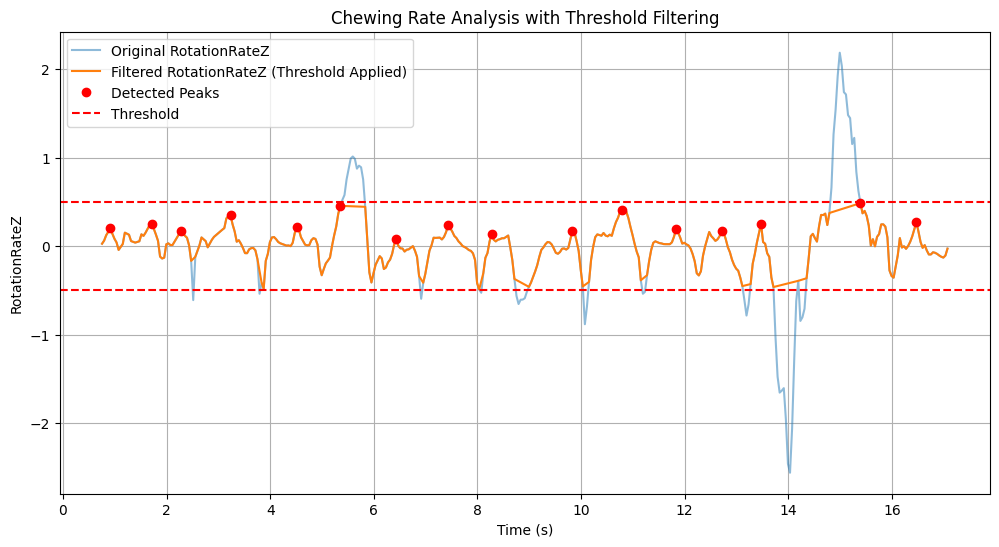

Chewing Rate: 57.84 motions/min
FromSeconds:0 Seconds At which current bite was Taken: 2.0
Number of Chews in the interval: 2
Chewing Rate: 57.84 motions/min
FromSeconds:2.0 Seconds At which current bite was Taken: 10.5
Number of Chews in the interval: 8


In [17]:
# This code if for module 1 which detects at which second bite was taken and pass it to the module 2 which further detects the number of chews performed for last bite taken.

file_name = testingFolderLocation+"WristMotion.csv"
testData = pd.read_csv(file_name)

for col in ['accelerationX', 'accelerationY', 'accelerationZ']:
    testData[f'filtered_{col}'] = biteDetectionLowPassFilter(testData[col])

testFeatures = []
for start in range(0, len(testData) - window_size + 1, step_size):
    window = testData.iloc[start:start + window_size]
    testFeatures.append(extract_features(window))

# THis finds all the peaks when the chews were performed
peaks, filtered_time = findPeaks()

continuousStripCounter = 0

#longest Strips of detected 1's i.e. detected Bite taken.
thresholdLongestStrip = 2
stripStart = 0
stripEnd = 0

biteStart = window_size

lastBiteSecond = 0
showGraph = True
stripStarted = False

biteCalculations = 0

for feature in testFeatures:
  bitePredicted = clf.predict([feature])
  #print(bitePredicted)
  if bitePredicted:
    biteCalculations += 1
    continuousStripCounter += 1

    if not stripStarted:
        stripStart = biteStart - 250
        stripStarted = True
  else:
    stripStarted = False
    stripEnd = biteStart-50

    if continuousStripCounter >= thresholdLongestStrip and biteCalculations >= 1:
        #print(f"Debug StripStart : {stripStart} , StripEnd: {stripEnd}")
        secondAtWhichBiteWasTaken = (stripStart + ((stripEnd - stripStart)/2)) / 100
        #Calculate chew
        findChewingBitesTaken(lastBiteSecond, secondAtWhichBiteWasTaken, peaks, filtered_time)
        showGraph = False

        #Updating last bite taken
        lastBiteSecond = secondAtWhichBiteWasTaken
    continuousStripCounter = 0


  biteStart += step_size
